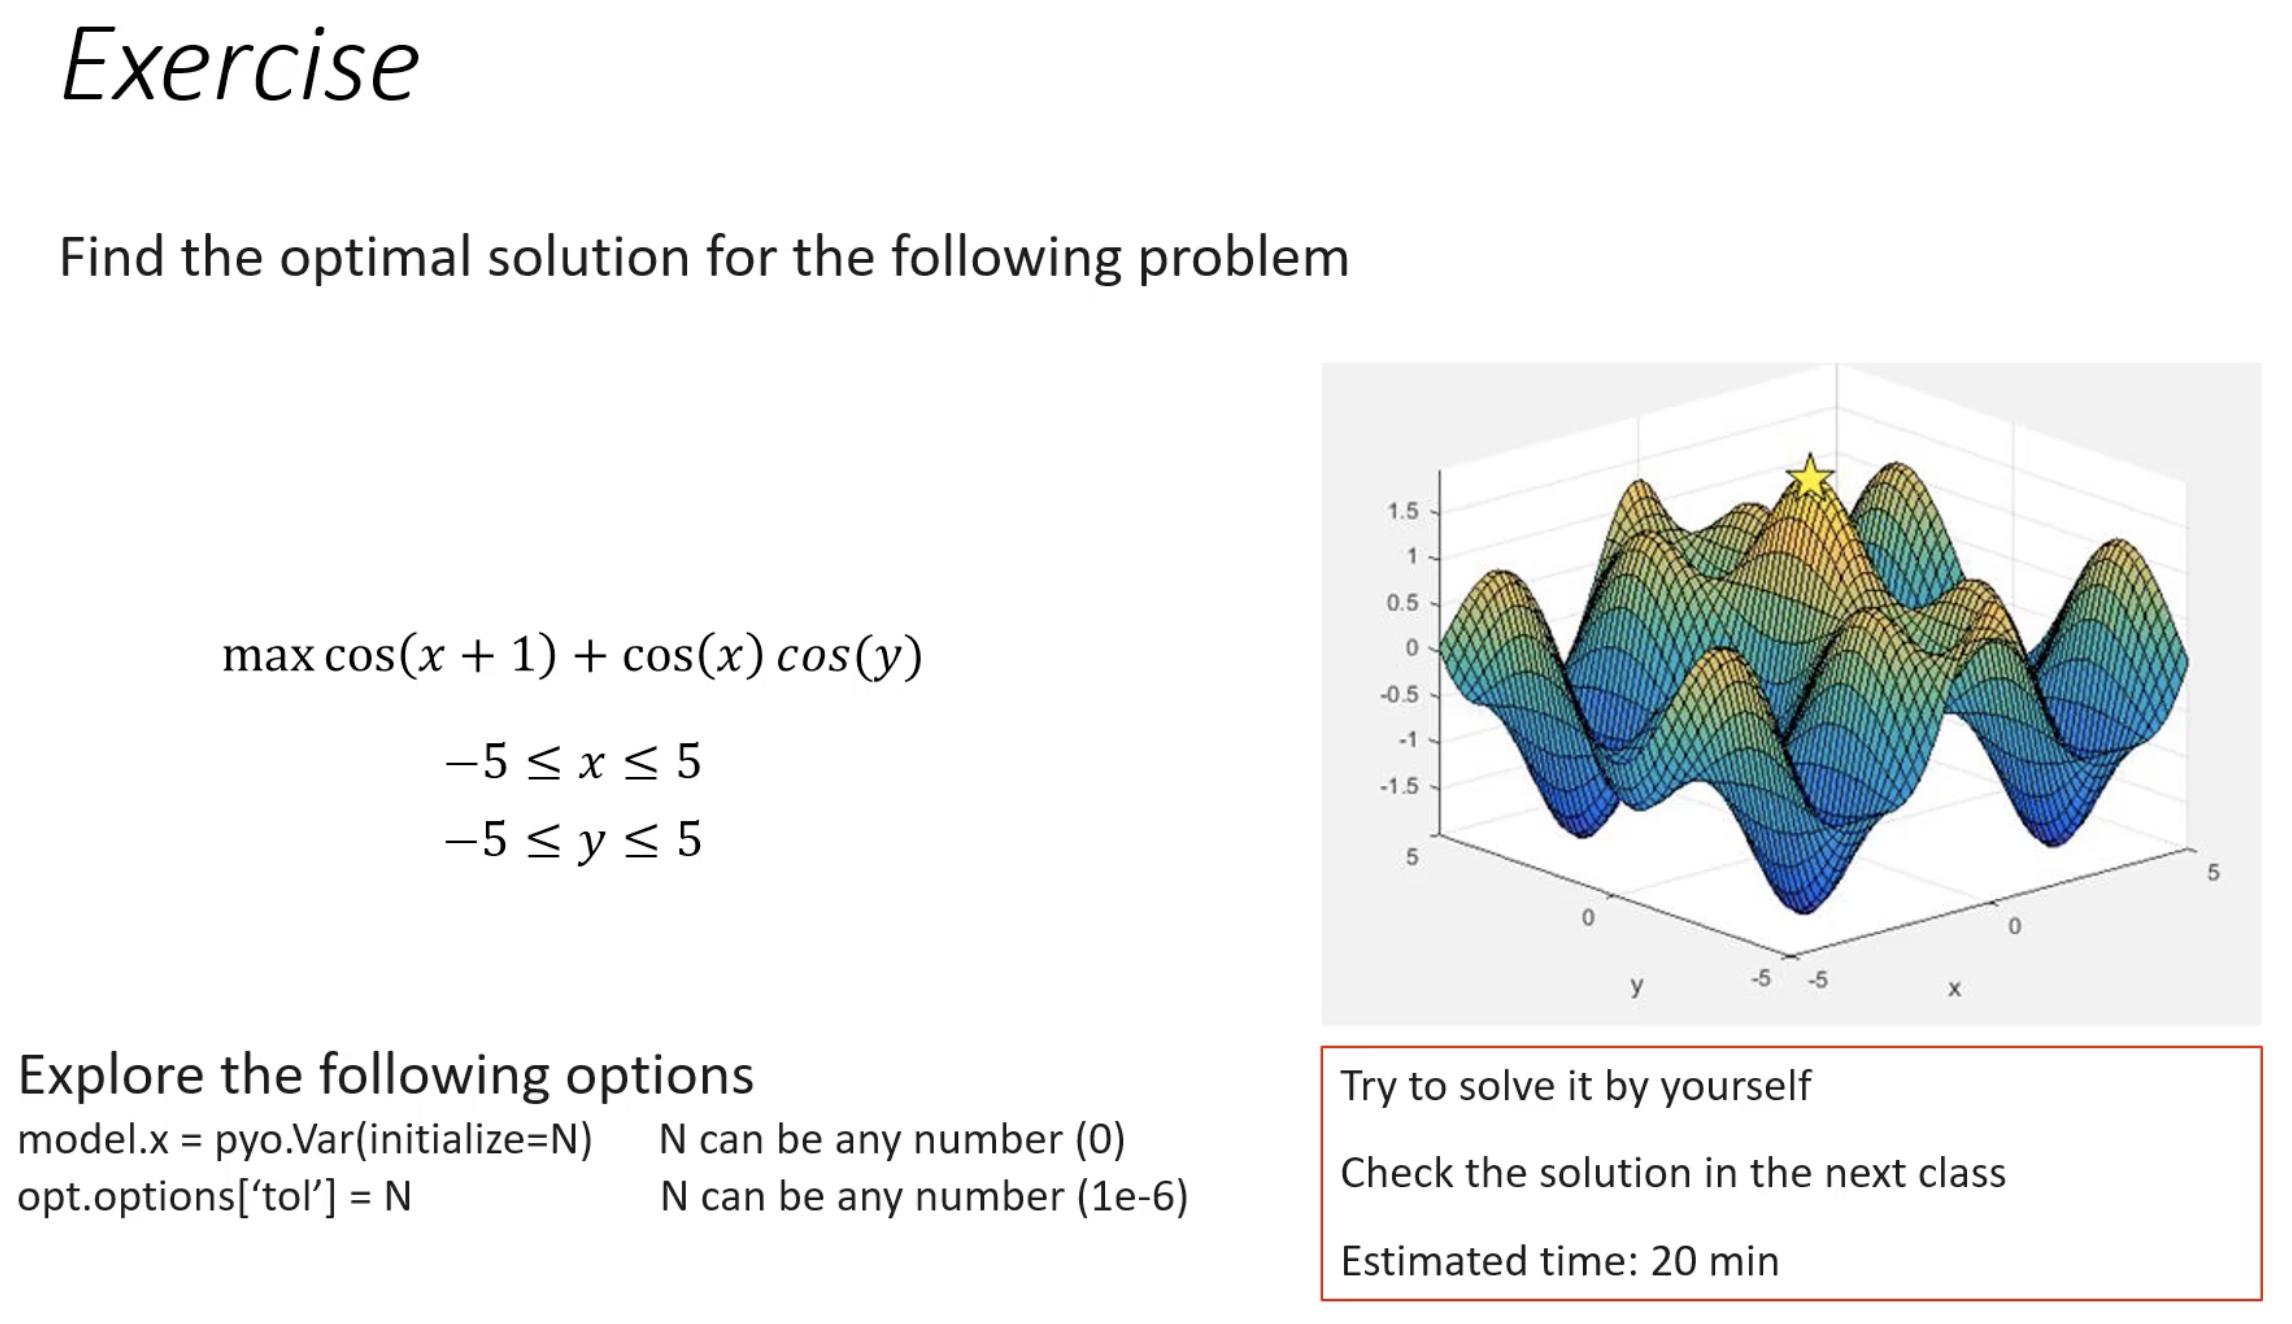

In [2]:
import pyomo.environ as pyo
from pyomo.environ import *
from pyomo.opt import SolverFactory
import numpy as np

model = pyo.ConcreteModel()

model.x = pyo.Var(initialize=0, bounds=(-5,5))
model.y = pyo.Var(initialize=0, bounds=(-5,5))
x = model.x
y = model.y


model.obj = pyo.Objective(expr= cos(x+1) + cos(x)*cos(y), sense=maximize)

opt = SolverFactory("ipopt")
opt.options['tol']=1e-6 # Tolerance
opt.solve(model)

model.pprint()

print('\n---------------------------------------------------------------------')
print('x =',pyo.value(x))
print('y =',pyo.value(y))
print(f"The maximum is: {cos(pyo.value(x)+1) + cos(pyo.value(x))*cos(pyo.value(y))}")

2 Var Declarations
    x : Size=1, Index=None
        Key  : Lower : Value                : Upper : Fixed : Stale : Domain
        None :    -5 : -0.49999999790726224 :     5 : False : False :  Reals
    y : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :    -5 :   0.0 :     5 : False : False :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : cos(x + 1) + cos(x)*cos(y)

3 Declarations: x y obj

---------------------------------------------------------------------
x = -0.49999999790726224
y = 0.0
The maximum is: 1.7551651237807455
